# Employee Attrition & Performance Analysis

**Author**: Dhaara Thakkar

In [21]:
!pip install ipython-sql

In [22]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [23]:
import pandas as pd
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset
df = pd.read_csv(r"C:\Users\Admin\Documents\Projects\IBM HR Analysis\WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Save it to a SQLite database
conn = sqlite3.connect("hr_attrition.db")
df.to_sql("employees", conn, if_exists="replace", index=False)

1470

In [24]:
query = "SELECT Attrition, COUNT(*) as count FROM employees GROUP BY Attrition;"
df_result = pd.read_sql_query(query, conn)
df_result.head()

,Attrition,count
0,No,1233
1,Yes,237


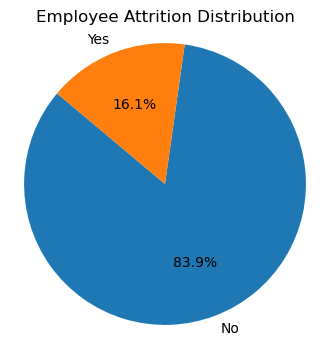

In [25]:
labels = df_result['Attrition']
sizes = df_result['count']

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Employee Attrition Distribution')
plt.axis('equal') 

plt.savefig('attrition_piechart.png', dpi=300, bbox_inches='tight')

plt.show()

In [26]:
query = "SELECT Department, COUNT(*) AS total, SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) AS attritions, ROUND(100.0 * SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS attrition_rate FROM employees GROUP BY Department ORDER BY attrition_rate DESC;"
df_dept = pd.read_sql_query(query, conn)
df_dept.head()

,Department,total,attritions,attrition_rate
0,Sales,446,92,20.63
1,Human Resources,63,12,19.05
2,Research & Development,961,133,13.84


C:\Users\Admin\AppData\Local\Temp\ipykernel_3932\3492178668.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='attrition_rate', y='Department', data=df_dept, palette='coolwarm')


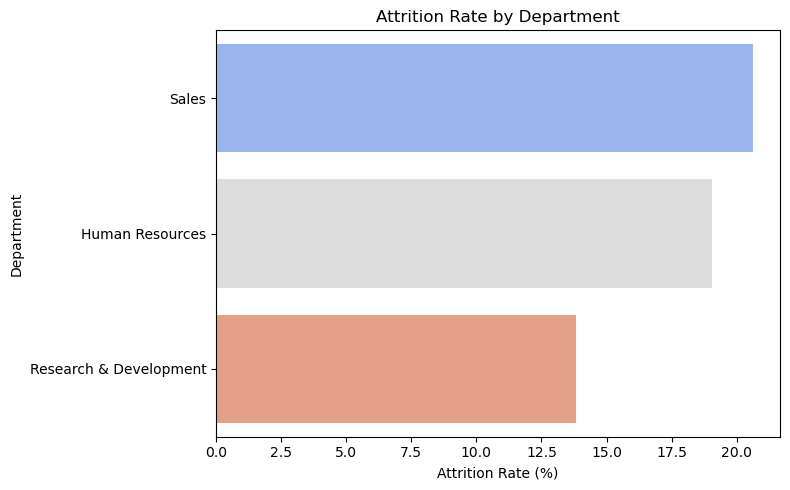

In [27]:
plt.figure(figsize=(8, 5))
sns.barplot(x='attrition_rate', y='Department', data=df_dept, palette='coolwarm')
plt.xlabel('Attrition Rate (%)')
plt.ylabel('Department')
plt.title('Attrition Rate by Department')
plt.tight_layout()

plt.savefig('attrition_by_department.png', dpi=300)
plt.show()

In [28]:
query = "SELECT JobRole, ROUND(AVG(MonthlyIncome), 2) AS avg_income FROM employees GROUP BY JobRole ORDER BY avg_income DESC;"
df_income = pd.read_sql_query(query, conn)
df_income.head()

,JobRole,avg_income
0,Manager,17181.68
1,Research Director,16033.55
2,Healthcare Representative,7528.76
3,Manufacturing Director,7295.14
4,Sales Executive,6924.28


C:\Users\Admin\AppData\Local\Temp\ipykernel_3932\1887592280.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_income', y='JobRole', data=df_income, palette='viridis')


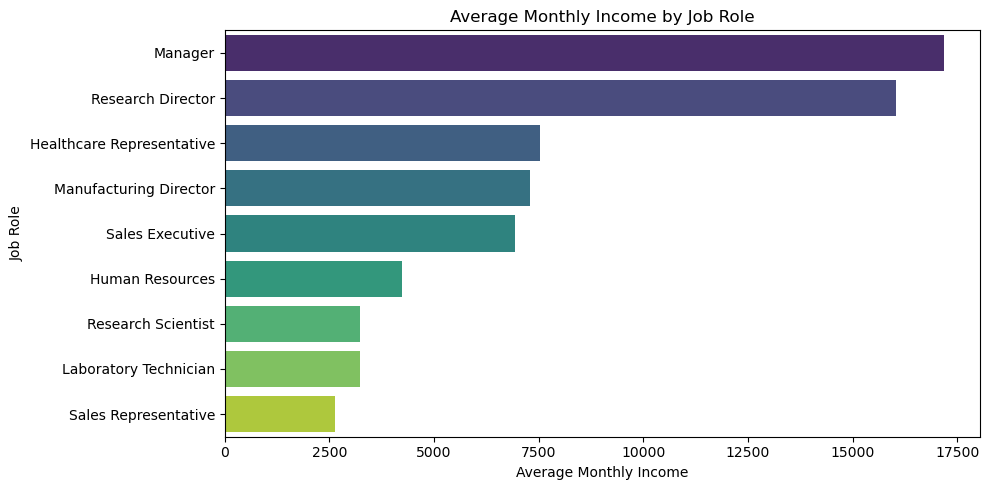

In [29]:
plt.figure(figsize=(10, 5))
sns.barplot(x='avg_income', y='JobRole', data=df_income, palette='viridis')
plt.xlabel('Average Monthly Income')
plt.ylabel('Job Role')
plt.title('Average Monthly Income by Job Role')
plt.tight_layout()

plt.savefig('avg_income_by_jobrole.png', dpi=300)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_3932\4272776284.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='attrition_rate', data=df_age, palette='Set2')


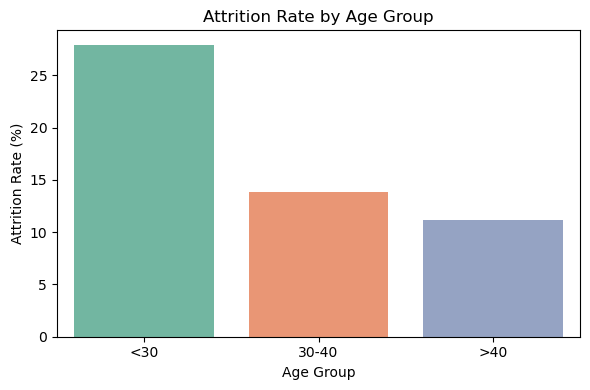

In [30]:
query = """SELECT 
  CASE 
    WHEN Age < 30 THEN '<30'
    WHEN Age BETWEEN 30 AND 40 THEN '30-40'
    ELSE '>40' 
  END AS AgeGroup,
  COUNT(*) AS total,
  SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) AS attritions,
  ROUND(100.0 * SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END)/COUNT(*), 2) AS attrition_rate
FROM employees
GROUP BY AgeGroup
ORDER BY attrition_rate DESC;"""

df_age = pd.read_sql_query(query, conn)

plt.figure(figsize=(6, 4))
sns.barplot(x='AgeGroup', y='attrition_rate', data=df_age, palette='Set2')
plt.title('Attrition Rate by Age Group')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Age Group')
plt.tight_layout()
plt.savefig('attrition_by_agegroup.png', dpi=300)
plt.show()

In [59]:
df_age.head()

,AgeGroup,total,attritions,attrition_rate
0,<30,326,91,27.91
1,30-40,679,94,13.84
2,>40,465,52,11.18


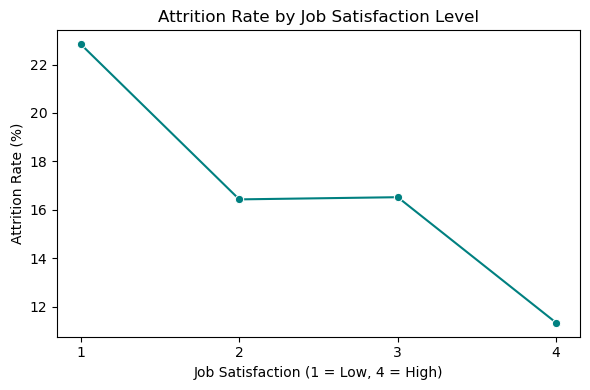

In [63]:
query = """SELECT JobSatisfaction, 
       COUNT(*) AS total,
       SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) AS attritions,
       ROUND(100.0 * SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS attrition_rate
FROM employees
GROUP BY JobSatisfaction
ORDER BY JobSatisfaction;
"""

df_satisfaction = pd.read_sql_query(query, conn)

plt.figure(figsize=(6, 4))
sns.lineplot(x='JobSatisfaction', y='attrition_rate', data=df_satisfaction, marker='o', color='teal')
plt.title('Attrition Rate by Job Satisfaction Level')
plt.xlabel('Job Satisfaction (1 = Low, 4 = High)')
plt.ylabel('Attrition Rate (%)')
plt.xticks([1, 2, 3, 4])
plt.tight_layout()
plt.savefig('attrition_by_jobsatisfaction.png', dpi=300)
plt.show()

In [65]:
df_satisfaction.head()

,JobSatisfaction,total,attritions,attrition_rate
0,1,289,66,22.84
1,2,280,46,16.43
2,3,442,73,16.52
3,4,459,52,11.33


C:\Users\Admin\AppData\Local\Temp\ipykernel_3932\552890832.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='WorkLifeBalance', y='attrition_rate', data=df_wlb, palette='cool')


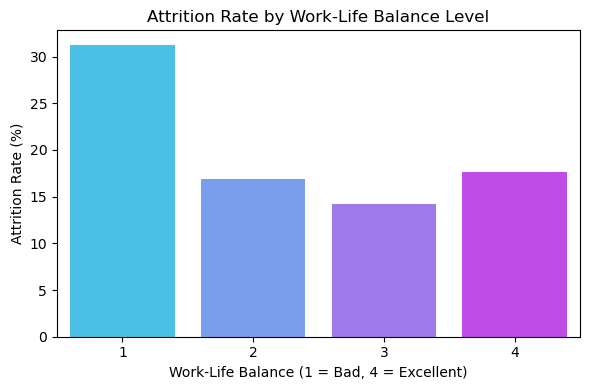

In [67]:
query = """
SELECT WorkLifeBalance,
       COUNT(*) AS total,
       SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) AS attritions,
       ROUND(100.0 * SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS attrition_rate
FROM employees
GROUP BY WorkLifeBalance
ORDER BY WorkLifeBalance;
"""
df_wlb = pd.read_sql_query(query, conn)

plt.figure(figsize=(6, 4))
sns.barplot(x='WorkLifeBalance', y='attrition_rate', data=df_wlb, palette='cool')
plt.title('Attrition Rate by Work-Life Balance Level')
plt.xlabel('Work-Life Balance (1 = Bad, 4 = Excellent)')
plt.ylabel('Attrition Rate (%)')
plt.tight_layout()
plt.savefig('attrition_by_wlb.png', dpi=300)
plt.show()

In [69]:
df_wlb.head()

,WorkLifeBalance,total,attritions,attrition_rate
0,1,80,25,31.25
1,2,344,58,16.86
2,3,893,127,14.22
3,4,153,27,17.65


C:\Users\Admin\AppData\Local\Temp\ipykernel_3932\1415148838.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Attrition', y='avg_distance', data=df_distance, palette='pastel')


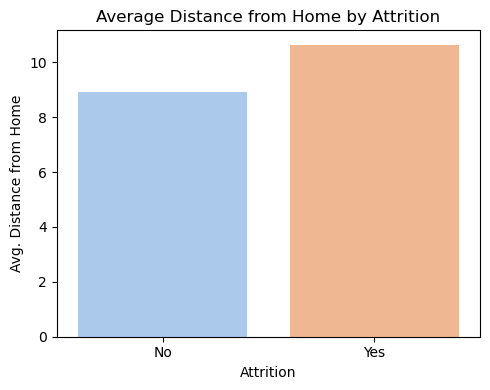

In [71]:
query = """
SELECT Attrition, ROUND(AVG(DistanceFromHome), 2) AS avg_distance
FROM employees
GROUP BY Attrition;
"""
df_distance = pd.read_sql_query(query, conn)

plt.figure(figsize=(5, 4))
sns.barplot(x='Attrition', y='avg_distance', data=df_distance, palette='pastel')
plt.title('Average Distance from Home by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Avg. Distance from Home')
plt.tight_layout()
plt.savefig('distance_by_attrition.png', dpi=300)
plt.show()

In [73]:
df_distance.head()

,Attrition,avg_distance
0,No,8.92
1,Yes,10.63


C:\Users\Admin\AppData\Local\Temp\ipykernel_3932\892815415.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='attrition_rate', y='EducationField', data=df_edu, palette='flare')


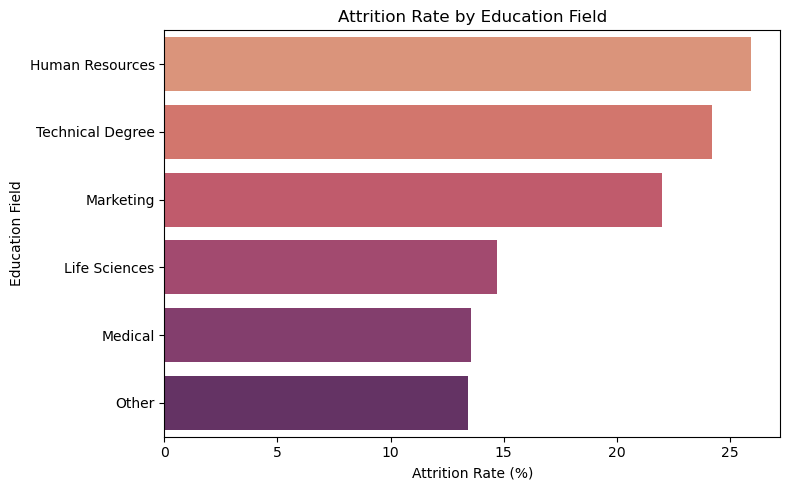

In [75]:
query = """
SELECT EducationField,
       COUNT(*) AS total,
       SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) AS attritions,
       ROUND(100.0 * SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS attrition_rate
FROM employees
GROUP BY EducationField
ORDER BY attrition_rate DESC;
"""
df_edu = pd.read_sql_query(query, conn)

plt.figure(figsize=(8, 5))
sns.barplot(x='attrition_rate', y='EducationField', data=df_edu, palette='flare')
plt.title('Attrition Rate by Education Field')
plt.xlabel('Attrition Rate (%)')
plt.ylabel('Education Field')
plt.tight_layout()
plt.savefig('attrition_by_educationfield.png', dpi=300)
plt.show()

In [77]:
df_edu.head()

,EducationField,total,attritions,attrition_rate
0,Human Resources,27,7,25.93
1,Technical Degree,132,32,24.24
2,Marketing,159,35,22.01
3,Life Sciences,606,89,14.69
4,Medical,464,63,13.58


C:\Users\Admin\AppData\Local\Temp\ipykernel_3932\965331390.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PerformanceRating', y='attrition_rate', data=df_perf, palette='viridis')


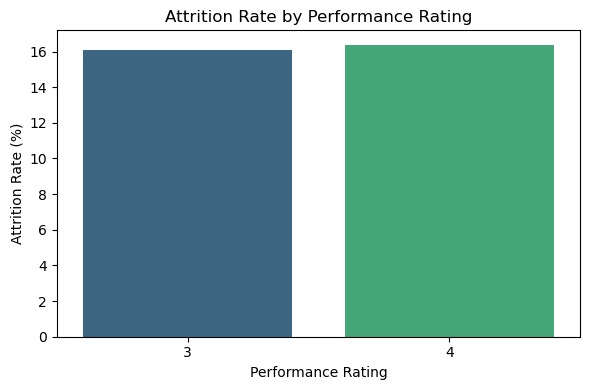

In [102]:
query = """
SELECT PerformanceRating,
       COUNT(*) AS total,
       SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) AS attritions,
       ROUND(100.0 * SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END)/COUNT(*), 2) AS attrition_rate
FROM employees
GROUP BY PerformanceRating
ORDER BY PerformanceRating;
"""
df_perf = pd.read_sql_query(query, conn)

plt.figure(figsize=(6, 4))
sns.barplot(x='PerformanceRating', y='attrition_rate', data=df_perf, palette='viridis')
plt.title('Attrition Rate by Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Attrition Rate (%)')
plt.tight_layout()
plt.savefig('attrition_by_performance.png', dpi=300)
plt.show()

In [104]:
df_perf.head()

,PerformanceRating,total,attritions,attrition_rate
0,3,1244,200,16.08
1,4,226,37,16.37


In [31]:
df.shape

(1470, 35)

In [32]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [33]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [34]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [35]:
df.duplicated().sum()

0

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [96]:
query = "SELECT DISTINCT PerformanceRating FROM employees;"
df_perf_unique = pd.read_sql_query(query, conn)
df_perf_unique

,PerformanceRating
0,3
1,4


In [98]:
query = """
SELECT PerformanceRating, COUNT(*) AS count
FROM employees
GROUP BY PerformanceRating
ORDER BY PerformanceRating;
"""
df_perf_count = pd.read_sql_query(query, conn)
df_perf_count

,PerformanceRating,count
0,3,1244
1,4,226


In [100]:
query = "SELECT DISTINCT JobSatisfaction FROM employees ORDER BY JobSatisfaction;"
df_js_unique = pd.read_sql_query(query, conn)
df_js_unique

,JobSatisfaction
0,1
1,2
2,3
3,4
